# Used Car Price Prediction



In [152]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
sns.set()

In [153]:
data = pd.read_excel('Used_car2.xlsx')

In [154]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9893 entries, 0 to 9892
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Marque               9893 non-null   object
 1   Model                9893 non-null   object
 2   Prix                 9893 non-null   int64 
 3   Mise_en_circulation  9893 non-null   int64 
 4   Puissance_fiscale    9893 non-null   int64 
 5   Kilometrage          9893 non-null   int64 
 6   Carburant            9893 non-null   object
 7   Boite_Vitesse        9893 non-null   object
 8   Gouvernorat          9888 non-null   object
dtypes: int64(4), object(5)
memory usage: 695.7+ KB


In [155]:
data.head()

,Marque,Model,Prix,Mise_en_circulation,Puissance_fiscale,Kilometrage,Carburant,Boite_Vitesse,Gouvernorat
0,Volkswagen,Golf7,55000,2016,5,114000,Essence,Manuelle,tunis
1,Volkswagen,Golf7,68900,2017,5,72000,Essence,Manuelle,tunis
2,Volkswagen,Golf7,53000,2014,5,153000,Essence,Manuelle,tunis
3,Volkswagen,Polo7,24000,2010,5,272000,Essence,Manuelle,tunis
4,Volkswagen,Golf7,52000,2015,5,130000,Essence,Manuelle,tunis


In [156]:
data.tail()

,Marque,Model,Prix,Mise_en_circulation,Puissance_fiscale,Kilometrage,Carburant,Boite_Vitesse,Gouvernorat
9888,Volkswagen,Jetta,55000,2016,6,134000,Essence,Automatique,tunis
9889,Volkswagen,Golf,33000,2011,6,113000,Diesel,Manuelle,tunis
9890,Volkswagen,Golf,60000,2016,6,6500,Essence,Manuelle,tunis
9891,Volkswagen,Golf,53000,2013,6,74000,Essence,Automatique,tunis
9892,Volkswagen,Golf,23500,2008,6,164900,Diesel,Manuelle,tunis


In [157]:
data.describe()

,Prix,Mise_en_circulation,Puissance_fiscale,Kilometrage
count,9893.000000,9893.000000,9893.000000,9893.000000
mean,45331.076923,2012.170626,6.569696,139523.691802
std,38721.719975,5.277059,3.204500,72275.870631
min,8000.000000,1990.000000,1.000000,1000.000000
25%,24000.000000,2010.000000,5.000000,85000.000000
50%,34500.000000,2013.000000,6.000000,136000.000000
75%,52000.000000,2016.000000,7.000000,190000.000000
max,400000.000000,2022.000000,50.000000,300000.000000


In [158]:
data.shape

(9893, 9)

In [159]:
data['Kilometrage'].value_counts()

200000    255
150000    194
100000    176
160000    163
300000    161
         ... 
81420       1
48700       1
296531      1
7800        1
12274       1
Name: Kilometrage, Length: 919, dtype: int64

In [160]:
# Looking ate the unique values of Categorical Features
print(data['Gouvernorat'].unique() )
print("")
print(data['Carburant'].unique())
print("")
print(data['Boite_Vitesse'].unique())
print("")
print(data['Marque'].unique())


['tunis' 'ariana' 'benarous' 'sousse' 'sfax' 'ben-arous' 'medenine'
 'nabeul' 'bizerte' 'mannouba' 'gabes' 'kef' 'siliana' 'monastir'
 'kairouan' 'kasserine' 'lamanouba' 'gafsa' 'mahdia' 'médenine' 'gabès'
 'tataouine' 'jendouba' 'zaghouan' 'manouba' 'lekef' 'beja' 'sidi-bouzid'
 'sidibouzid' 'tozeur' 'béja' 'kébili' 'kebili' 'le-kef' nan]

['Essence' 'Diesel']

['Manuelle' 'Automatique']

['Volkswagen' 'Renault' 'Fiat' 'Peugeot' 'Opel' 'Dacia' 'Citroen' 'Kia'
 'Toyota' 'Nissan' 'MGMotors' 'Ford' 'Seat' 'Wallyscar' 'Hyundai' 'Buick'
 'Mini' 'Chevrolet' 'Honda' 'Audi' 'Mercedes' 'Suzuki' 'CITROËN'
 'MAHINDRA' 'DS' 'Mazda' 'ALFA' 'CHERY' 'AlfaRomeo' 'Citroën' 'BMW' 'AC'
 'MERCEDES-BENZ' 'MG' 'Skoda' 'Isuzu' 'Mega' 'Lancia' 'DFSK' 'TATA'
 'Mitsubishi' 'GREAT' 'GEELY' 'Jeep' 'Chrysler' 'DONGFENG' 'Ssangyong'
 'Volvo' 'Haval' 'Daewoo' 'Smart' 'Daihatsu' 'BAIC' 'Austin' 'BAICYX'
 'LADA' 'Jaguar' 'Land-Rover' 'LAND_ROVER' 'Land' 'Landrover' 'Acura'
 'Lexus' 'Porsche' 'GENESIS' 'IVECO' 'DODGE'

In [161]:
data.Gouvernorat = data.Gouvernorat.str.lower()

def replace_name(a,b):
    data.Gouvernorat.replace(a,b,inplace=True)

replace_name('benarous','ben-arous')
replace_name('mannouba','manouba')
replace_name('lamanouba','manouba')
replace_name('lekef','kef')
replace_name('sidibouzid','sidi-bouzid')
replace_name('kébili','kebili')
replace_name('le-kef','kef')
replace_name('béja','beja')
replace_name('gabès','gabes')
replace_name('médenine','medenine')

data.Gouvernorat.unique()

array(['tunis', 'ariana', 'ben-arous', 'sousse', 'sfax', 'medenine',
       'nabeul', 'bizerte', 'manouba', 'gabes', 'kef', 'siliana',
       'monastir', 'kairouan', 'kasserine', 'gafsa', 'mahdia',
       'tataouine', 'jendouba', 'zaghouan', 'beja', 'sidi-bouzid',
       'tozeur', 'kebili', nan], dtype=object)

In [166]:
data.Marque = data.Marque.str.lower()
def replace_name(a,b):
    data.Marque.replace(a,b,inplace=True)
replace_name('ac','citroen')
replace_name('alfa','alfaromeo')
replace_name('great','greatwall')
replace_name('austin','aston martin')
replace_name('land','land rover')
replace_name('land-rover','land rover')
replace_name('landrover','land rover')
replace_name('land_rover','land rover')
replace_name('rover','land rover')
replace_name('wallys','wallyscar')
print(data['Marque'].unique())


['volkswagen' 'renault' 'fiat' 'peugeot' 'opel' 'dacia' 'citroen' 'kia'
 'toyota' 'nissan' 'mgmotors' 'ford' 'seat' 'wallyscar' 'hyundai' 'buick'
 'mini' 'chevrolet' 'honda' 'audi' 'mercedes' 'suzuki' 'citroën'
 'mahindra' 'ds' 'mazda' 'alfaromeo' 'chery' 'bmw' 'mercedes-benz' 'mg'
 'skoda' 'isuzu' 'mega' 'lancia' 'dfsk' 'tata' 'mitsubishi' 'greatwall'
 'geely' 'jeep' 'chrysler' 'dongfeng' 'ssangyong' 'volvo' 'haval' 'daewoo'
 'smart' 'daihatsu' 'baic' 'aston martin' 'baicyx' 'lada' 'jaguar'
 'land rover' 'acura' 'lexus' 'porsche' 'genesis' 'iveco' 'dodge' 'hummer'
 'foton' 'infiniti' 'lincoln' 'cadillac' 'deawoo' 'aro']


In [167]:
data.isnull().sum()

Marque                 0
Model                  0
Prix                   0
Mise_en_circulation    0
Puissance_fiscale      0
Kilometrage            0
Carburant              0
Boite_Vitesse          0
Gouvernorat            5
dtype: int64

In [168]:
data = data[data['Gouvernorat'].notna()]

In [169]:
data = data.reset_index(drop=True)

In [173]:
data.drop_duplicates(inplace=True) 
#removing repetitive lines

In [174]:
data.shape

(8922, 9)

Well after using *.notna()* we have many absent indexes so I reset the index and droping the present index.

# Data Visualization

Data visualization is the best way to find out how a data looks like

In [207]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9888 entries, 0 to 9887
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Marque               9888 non-null   object
 1   Model                9888 non-null   object
 2   Prix                 9888 non-null   int64 
 3   Mise_en_circulation  9888 non-null   int64 
 4   Puissance_fiscale    9888 non-null   int64 
 5   Kilometrage          9888 non-null   int64 
 6   Carburant            9888 non-null   object
 7   Boite_Vitesse        9888 non-null   object
 8   Gouvernorat          9888 non-null   object
dtypes: int64(4), object(5)
memory usage: 695.4+ KB


In [15]:
data['Prix'].describe()

count      9888.000000
mean      45319.614078
std       38703.760160
min        8000.000000
25%       24000.000000
50%       34500.000000
75%       52000.000000
max      400000.000000
Name: Prix, dtype: float64

### Price

First let's have a look over our target column

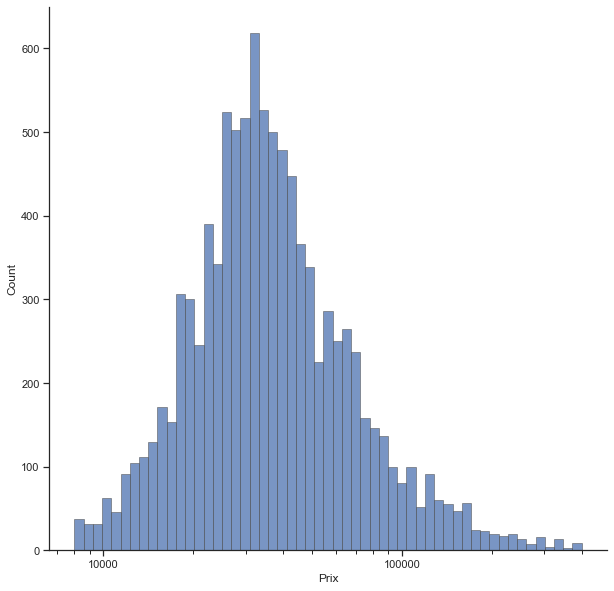

In [16]:
sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(10, 10))
sns.despine(f)

sns.histplot(
    data,
    x=data['Prix'],
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())

C:\Users\Garbey Ala\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Car Price Spread'}, ylabel='Prix'>

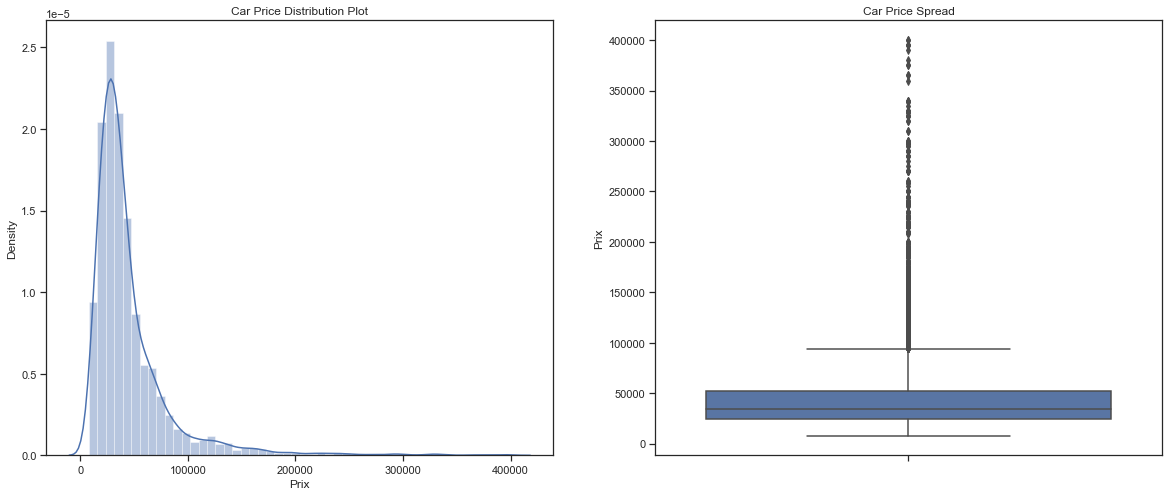

In [17]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(data.Prix)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=data.Prix)

In [18]:
print(data.Prix.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count      9888.000000
mean      45319.614078
std       38703.760160
min        8000.000000
25%       24000.000000
50%       34500.000000
75%       52000.000000
85%       68000.000000
90%       80000.000000
100%     400000.000000
max      400000.000000
Name: Prix, dtype: float64


- The plot seemed to be right-skewed, meaning that the most prices in the dataset are low(Below 100000).
- There is a significant difference between the mean and the median of the price distribution.
- The data points are far spread out from the mean, which indicates a high variance in the car prices.(90% of the prices are below 80000, whereas the remaining 10% are between 80000 and 400000)

### Fuel Type

In [19]:
data['Carburant'].describe()

count        9888
unique          2
top       Essence
freq         7181
Name: Carburant, dtype: object

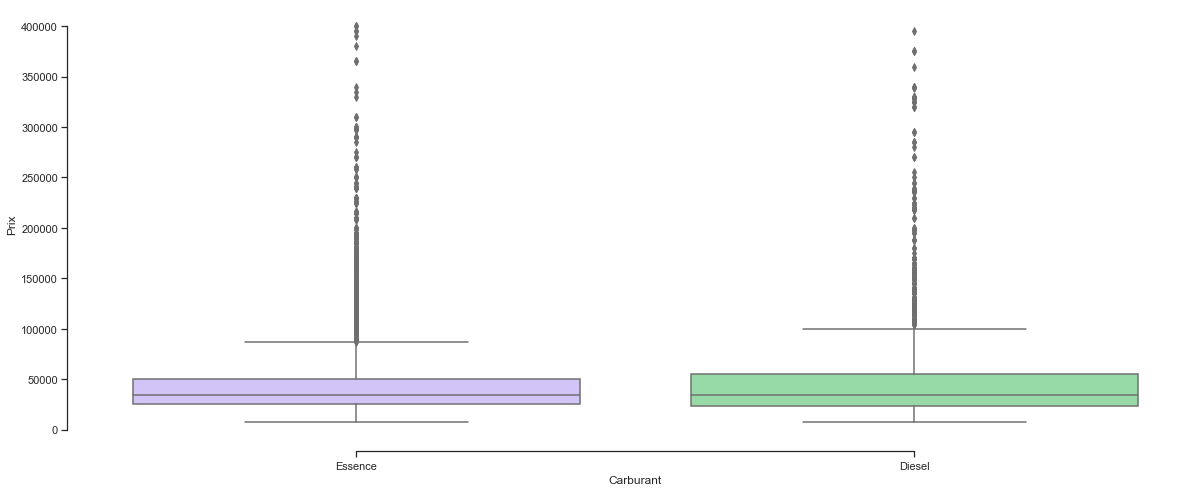

In [20]:
f, ax = plt.subplots(figsize=(20, 8))
sns.set_theme(style="ticks", palette="pastel")
var = 'Carburant'
# Draw a nested boxplot to show bills by day and time
sns.boxplot(x=var, y="Prix",
             palette=["m", "g"],
            data=data)
sns.despine(offset=10, trim=True)

- As, we thought diseal car would cost followed Petrol

C:\Users\Garbey Ala\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 80.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Garbey Ala\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 59.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Carburant', ylabel='Prix'>

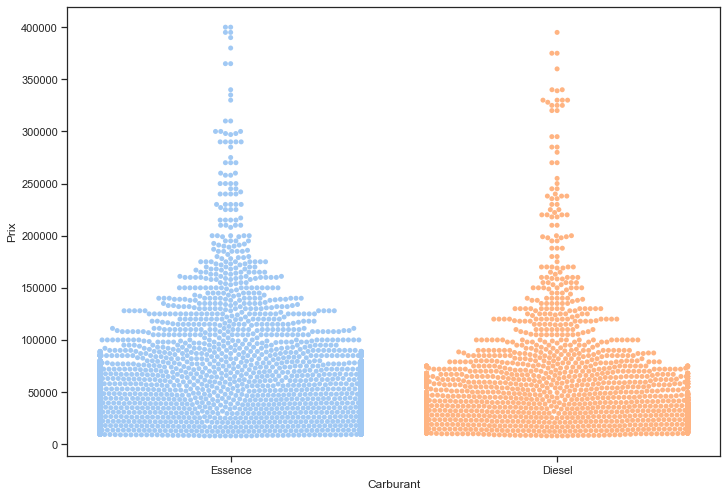

In [21]:
var = 'Carburant'
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.swarmplot(x = var, y ='Prix', data = data)

### Year

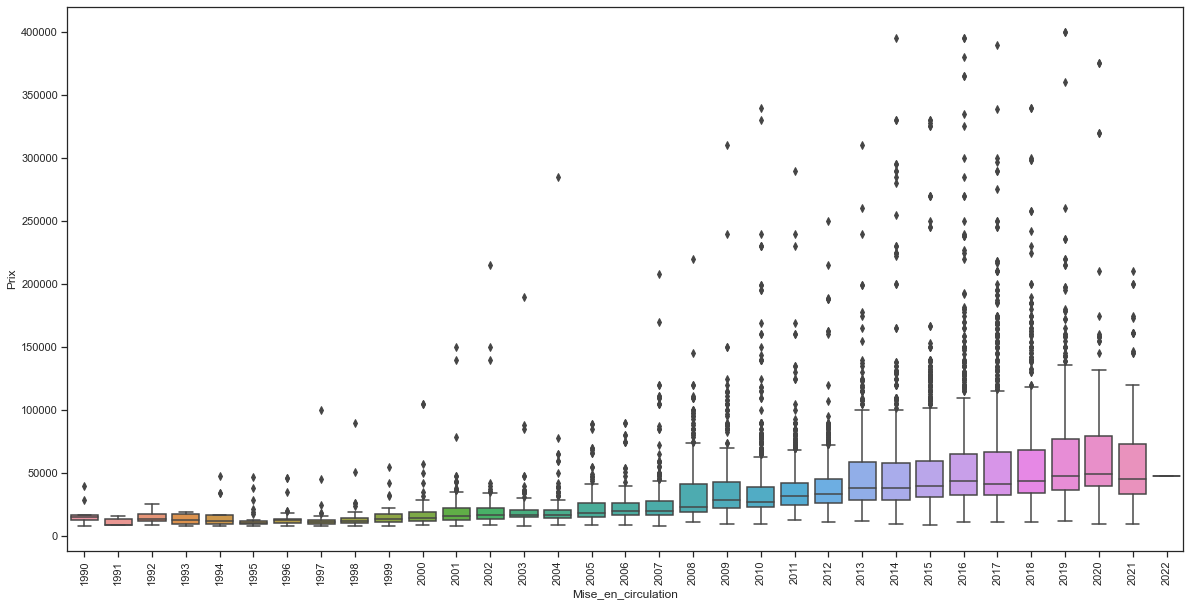

In [22]:
var = 'Mise_en_circulation'
data = pd.concat([data['Prix'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 10))
fig = sns.boxplot(x=var, y="Prix", data=data)
#fig.axis(ymin=0, ymax=165);
plt.xticks(rotation=90);

Clearly, it's a strong tendency.

Price of Newest is high compared to old models.

### Company

<Figure size 1440x720 with 0 Axes>

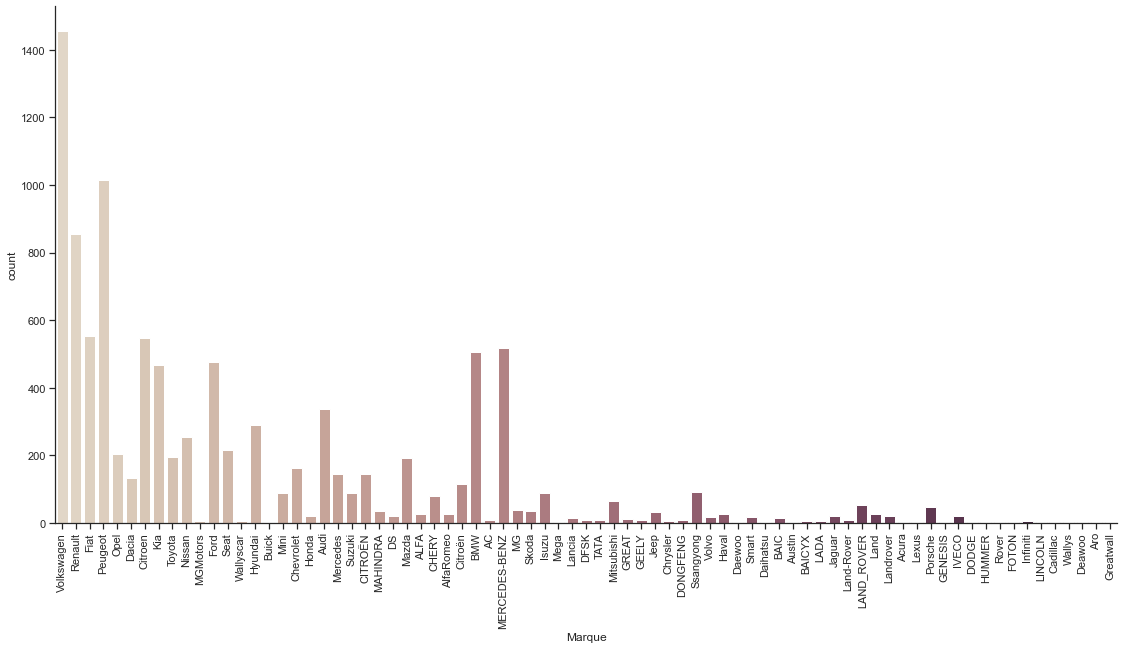

In [35]:
var = "Marque"
plt.figure(figsize=(20, 10))
sns.catplot(x=var, kind="count", palette="ch:.25", height=8, aspect=2, data=data);
plt.xticks(rotation=90);

Cleary **Volkswagen** is most comman brand followed by **Peugoet**

# Working with Categorical Data

As for now we have left with only 3 categorical features:
1. Location
2. Fuel_Type
3. Company

For hadeling categorical data. We modtly use these 2 path:
1. OneHotEncoder
2. LabelEncoder

Where OneHotEncoder is used where data are not in any order and LabelEncoder when data is in order.

So, for each Features we will use plots to find out what to be used there.

### Working for Location

In [36]:
var = 'Gouvernorat'
data[var].value_counts()

tunis          2724
ariana         1835
ben-arous      1549
sousse          780
nabeul          576
sfax            573
monastir        311
bizerte         267
manouba         261
kairouan        117
gafsa           115
medenine        107
gabes           106
mahdia           94
beja             80
kasserine        71
jendouba         64
zaghouan         61
kef              59
sidi-bouzid      58
siliana          23
tataouine        19
tozeur           19
kebili           19
Name: Gouvernorat, dtype: int64

From above values, we could judge that Tunis has most number of cars to be sold followed by others.

<function matplotlib.pyplot.show(close=None, block=None)>

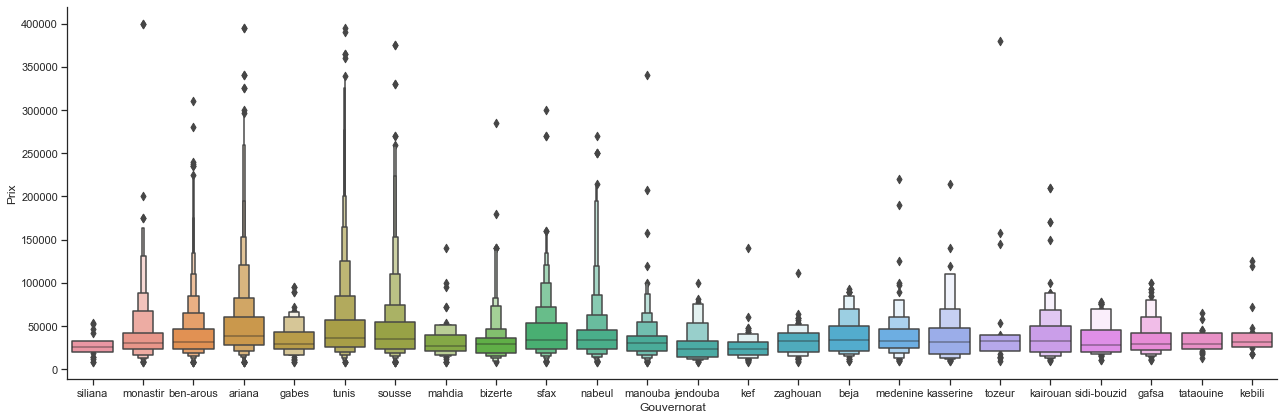

In [37]:
# Plot Location vs Price
sns.catplot(y='Prix',x=var,data= data.sort_values('Prix',ascending=True),kind="boxen",height=6, aspect=3)
plt.show

We will be using One-hot-encoding here

### Working for Fuel_Type

In [38]:
var = 'Carburant'
data[var].value_counts()

Essence    7181
Diesel     2707
Name: Carburant, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

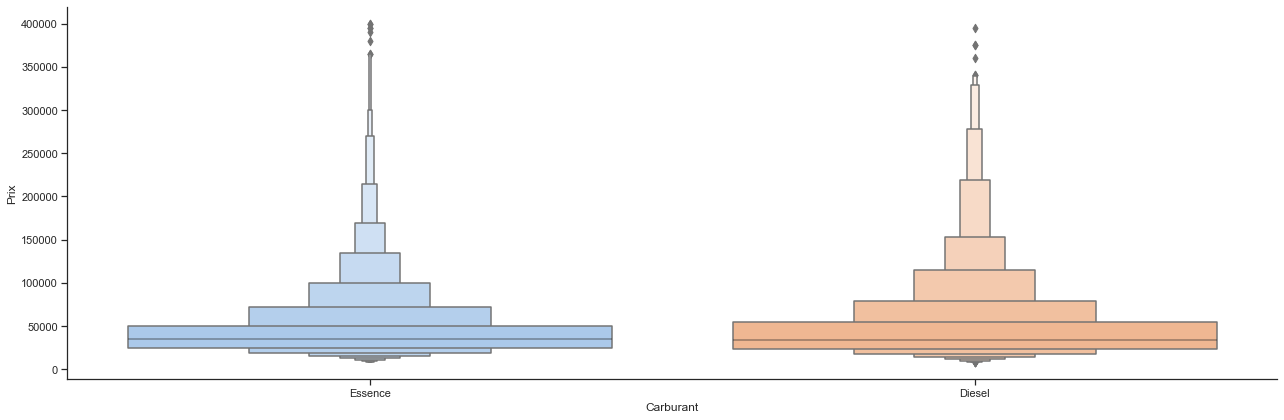

In [39]:
# Plot Fuel_Type vs Price
sns.catplot(y='Prix',x=var,data= data.sort_values('Prix',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

Again we will be using One-hot-encoding

### Working with Transmission

In [40]:
var = 'Boite_Vitesse'
data[var].value_counts()

Manuelle       7639
Automatique    2249
Name: Boite_Vitesse, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

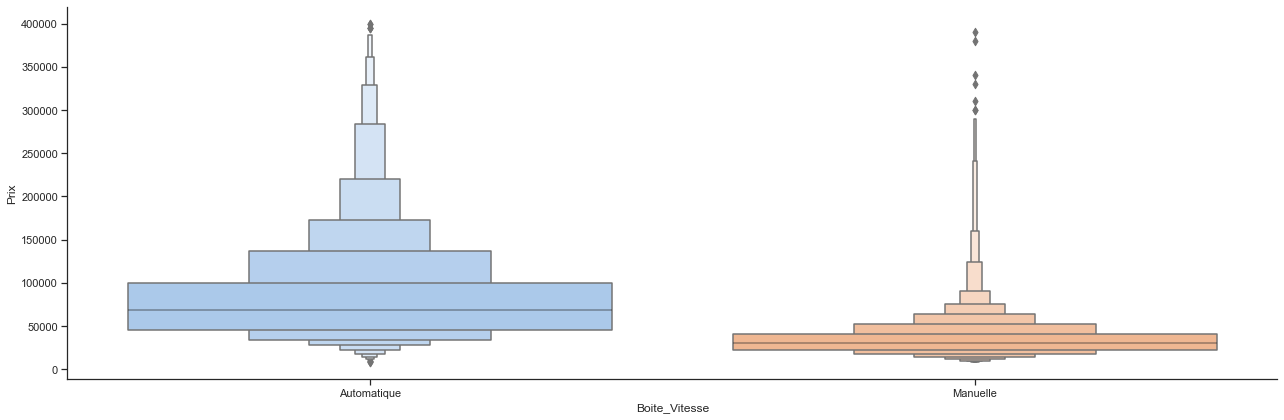

In [41]:
# Plot Transmission vs Price
sns.catplot(y='Prix',x=var,data= data.sort_values('Prix',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

No, order so One-hot-encoding

### Working with Company

In [42]:
var = 'Marque'
data[var].value_counts()

Volkswagen    1456
Peugeot       1016
Renault        855
Fiat           553
Citroen        546
              ... 
Cadillac         1
Wallys           1
Deawoo           1
Aro              1
Greatwall        1
Name: Marque, Length: 77, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 2160x2160 with 0 Axes>

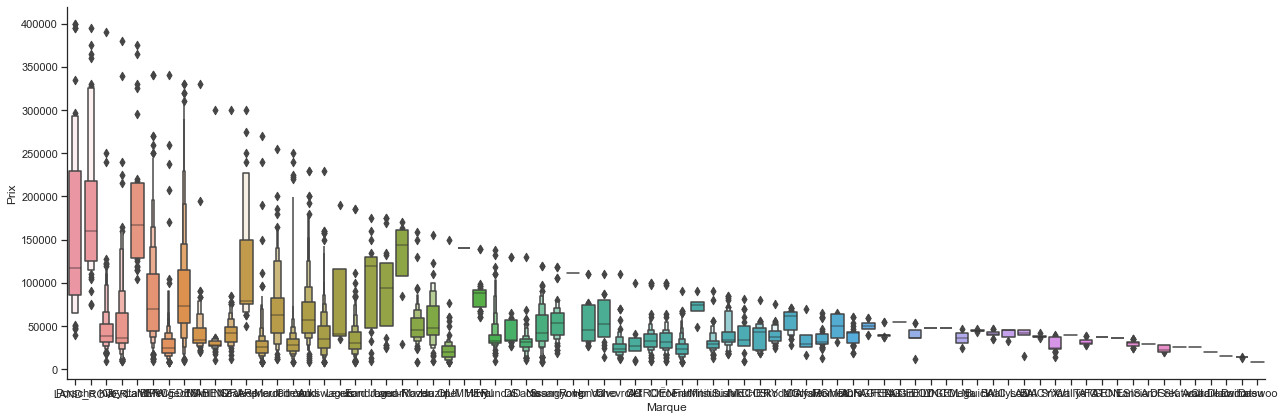

In [47]:
# Plot Company vs Price
plt.figure(figsize=(30,30))

sns.catplot(y='Prix',x=var,data= data.sort_values('Prix',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

A lot of variation 

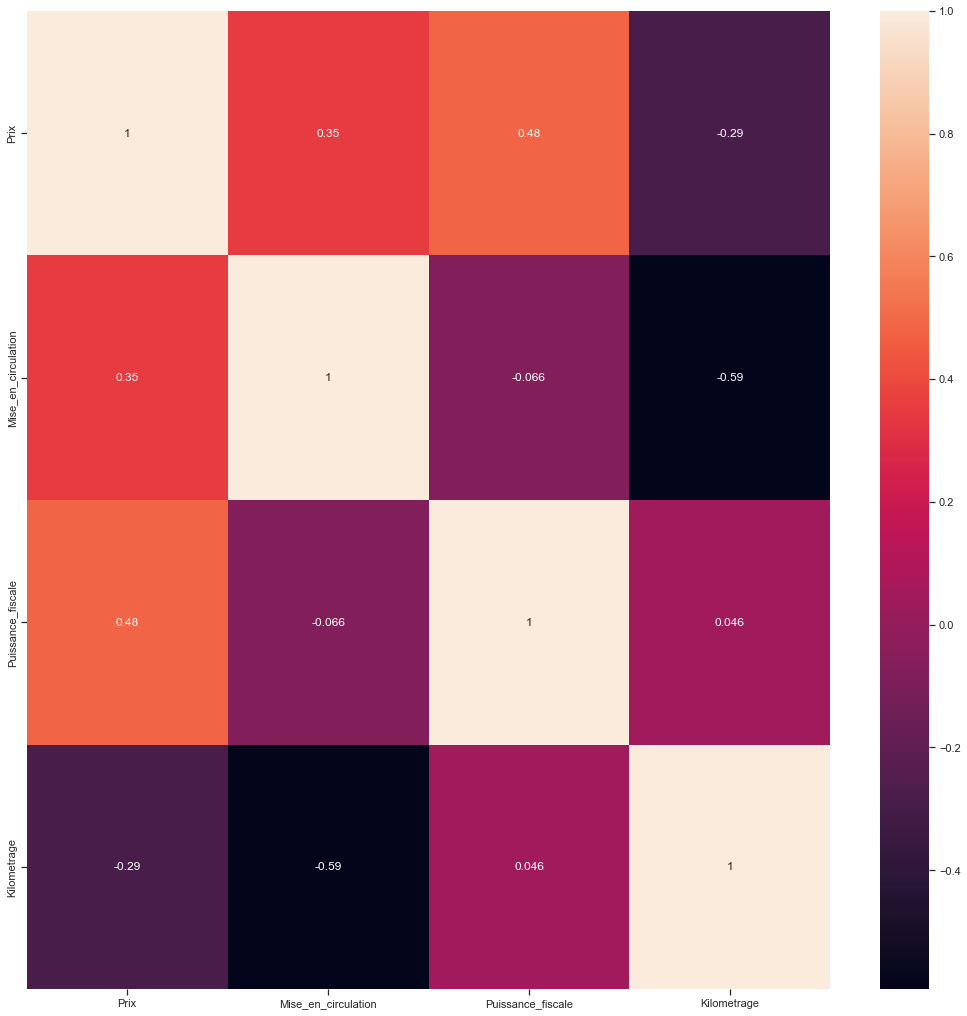

In [48]:
plt.figure(figsize=(18,18))
sns.heatmap(data.corr(),annot=True)

plt.show()

# Pre-processing for modeling


In [68]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression,chi2
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler ,MaxAbsScaler 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import LinearSVR, SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder # For Feature Engineering Method - Label Encoding
from sklearn.preprocessing import MinMaxScaler # For Normalization
from sklearn.model_selection import train_test_split # For Splitting the data into train data and test data
from sklearn.ensemble import RandomForestRegressor # For Creation of Random Forest Regressor Model
from sklearn.linear_model import LinearRegression # For Creation of Linear Regression Model
from catboost import CatBoostRegressor # For Creation of CatBoost Regressor Model
from sklearn.model_selection import learning_curve
# Libraries for calculationg Metrics of the Model we create:
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [69]:
data = pd.read_excel('Used_car2.xlsx')

In [70]:
data.Gouvernorat.unique()

array(['tunis', 'ariana', 'benarous', 'sousse', 'sfax', 'ben-arous',
       'medenine', 'nabeul', 'bizerte', 'mannouba', 'gabes', 'kef',
       'siliana', 'monastir', 'kairouan', 'kasserine', 'lamanouba',
       'gafsa', 'mahdia', 'médenine', 'gabès', 'tataouine', 'jendouba',
       'zaghouan', 'manouba', 'lekef', 'beja', 'sidi-bouzid',
       'sidibouzid', 'tozeur', 'béja', 'kébili', 'kebili', 'le-kef', nan],
      dtype=object)

In [71]:
data.Marque.unique()

array(['Volkswagen', 'Renault', 'Fiat', 'Peugeot', 'Opel', 'Dacia',
       'Citroen', 'Kia', 'Toyota', 'Nissan', 'MGMotors', 'Ford', 'Seat',
       'Wallyscar', 'Hyundai', 'Buick', 'Mini', 'Chevrolet', 'Honda',
       'Audi', 'Mercedes', 'Suzuki', 'CITROËN', 'MAHINDRA', 'DS', 'Mazda',
       'ALFA', 'CHERY', 'AlfaRomeo', 'Citroën', 'BMW', 'AC',
       'MERCEDES-BENZ', 'MG', 'Skoda', 'Isuzu', 'Mega', 'Lancia', 'DFSK',
       'TATA', 'Mitsubishi', 'GREAT', 'GEELY', 'Jeep', 'Chrysler',
       'DONGFENG', 'Ssangyong', 'Volvo', 'Haval', 'Daewoo', 'Smart',
       'Daihatsu', 'BAIC', 'Austin', 'BAICYX', 'LADA', 'Jaguar',
       'Land-Rover', 'LAND_ROVER', 'Land', 'Landrover', 'Acura', 'Lexus',
       'Porsche', 'GENESIS', 'IVECO', 'DODGE', 'HUMMER', 'Rover', 'FOTON',
       'Infiniti', 'LINCOLN', 'Cadillac', 'Wallys', 'Deawoo', 'Aro',
       'Greatwall'], dtype=object)

In [72]:

def replace_name_marque(a,b):
    data.Marque.replace(a,b,inplace=True)


In [73]:
replace_name_marque('MG','MGMOTORS')
replace_name_marque('WALLYSCAR','WALLYS')
replace_name_marque('LAND_ROVER','LAND-ROVER')
replace_name_marque('ROVER','LAND-ROVER')
replace_name_marque('DEAWOO','DAEWOO')
replace_name_marque('GREAT','GREATWALL')

In [74]:
data.Gouvernorat = data.Gouvernorat.str.lower()

def replace_name(a,b):
    data.Gouvernorat.replace(a,b,inplace=True)

In [75]:
replace_name('benarous','ben-arous')
replace_name('mannouba','manouba')
replace_name('lamanouba','manouba')
replace_name('lekef','kef')
replace_name('sidibouzid','sidi-bouzid')
replace_name('kébili','kebili')
replace_name('le-kef','kef')
replace_name('béja','beja')
replace_name('gabès','gabes')
replace_name('médenine','medenine')

In [76]:
data = data[data['Gouvernorat'].notna()]
data = data[data['Marque'].notna()]

In [77]:
data = data.reset_index(drop=True)

In [78]:
max_thresold= data['Prix'].quantile(0.95)

In [79]:
data[data['Prix']> max_thresold]

,Marque,Model,Prix,Mise_en_circulation,Puissance_fiscale,Kilometrage,Carburant,Boite_Vitesse,Gouvernorat
679,Mini,Cooper,330000,2010,5,260000,Essence,Manuelle,tunis
703,Kia,RIO,390000,2017,5,109000,Essence,Manuelle,tunis
850,Opel,Astra,150000,2002,5,139130,Essence,Manuelle,ariana
936,Kia,RIO,250000,2012,5,195000,Essence,Manuelle,ariana
980,Citroen,C-zero,222222,2014,5,144000,Diesel,Manuelle,ariana
...,...,...,...,...,...,...,...,...,...
9417,BMW,Serie4,150000,2019,7,65000,Essence,Automatique,tunis
9422,BMW,SERIE3,125000,2016,7,50000,Essence,Automatique,tunis
9508,Citroen,C5,220000,2008,6,230000,Diesel,Manuelle,tunis
9585,Nissan,Qashqai,120000,2021,6,3000,Diesel,Manuelle,tunis


In [80]:
data=data[data.Prix < max_thresold]

In [81]:
data.shape

(9393, 9)

In [82]:
data["age_of_car"] = 2022 - data["Mise_en_circulation"]
data = data.drop(columns = ["Mise_en_circulation"])


In [83]:
counts_Model = data['Model'].value_counts()
data = data.loc[data['Model'].isin(counts_Model.index[counts_Model > 5])]

In [84]:
counts_Marque = data['Marque'].value_counts()
data = data.loc[data['Marque'].isin(counts_Marque.index[counts_Marque > 5])]

In [85]:
data.shape

(7856, 9)

In [86]:
data.sample(10)

,Marque,Model,Prix,Puissance_fiscale,Kilometrage,Carburant,Boite_Vitesse,Gouvernorat,age_of_car
2476,Ford,Fiesta,16500,5,270000,Essence,Manuelle,sousse,17
1697,Renault,Clio,39000,5,63000,Essence,Manuelle,ben-arous,3
6885,Audi,Q7,87000,16,60000,Diesel,Automatique,monastir,15
9434,Peugeot,407,19000,6,174000,Diesel,Manuelle,tunis,15
473,Toyota,YARISSEDAN,35000,5,128000,Essence,Manuelle,tunis,4
317,Fiat,Doblo,20000,5,256000,Diesel,Manuelle,tunis,5
9832,Volkswagen,Golf7,57000,6,82000,Essence,Manuelle,tunis,5
2745,Renault,Clio,33500,5,158000,Essence,Manuelle,nabeul,9
2939,Volkswagen,Golf,58000,5,109000,Diesel,Manuelle,ben-arous,6
7906,Volkswagen,Passat,25000,7,150000,Essence,Manuelle,ariana,13


In [87]:
data.Model.value_counts()

Polo                323
Clio                246
Passat              200
Golf7               189
Fiesta              188
                   ... 
Megane3               6
Bora                  6
XENONSC               6
RANGEROVEREVOQUE      6
ClasseS               6
Name: Model, Length: 250, dtype: int64

In [88]:
data.Marque.value_counts()

Volkswagen       1318
Peugeot           882
Renault           756
Citroen           508
Fiat              490
Kia               401
Ford              397
BMW               293
MERCEDES-BENZ     262
Hyundai           248
Audi              242
Nissan            216
Seat              171
Opel              170
Mazda             146
Toyota            142
CITROËN           138
Chevrolet         132
Dacia             121
Mercedes          101
Suzuki             75
Isuzu              75
Citroën            73
Ssangyong          70
CHERY              60
Mini               57
Mitsubishi         48
Skoda              31
MGMOTORS           28
AlfaRomeo          24
MAHINDRA           23
Jeep               18
ALFA               18
Porsche            18
IVECO              17
Haval              13
DS                 12
BAIC               10
GREATWALL           9
Lancia              9
DONGFENG            8
Smart               8
Honda               6
LAND-ROVER          6
TATA                6
Name: Marq

### Creating an OneHotEncoder object to contain all the possible categories

In [89]:
y = data['Prix']
X = data.drop('Prix', axis=1)

In [90]:
ohe=OneHotEncoder()
ohe.fit(X[['Marque','Model','Carburant','Boite_Vitesse','Gouvernorat']])

OneHotEncoder()

In [91]:
ohe.categories_

[array(['ALFA', 'AlfaRomeo', 'Audi', 'BAIC', 'BMW', 'CHERY', 'CITROËN',
        'Chevrolet', 'Citroen', 'Citroën', 'DONGFENG', 'DS', 'Dacia',
        'Fiat', 'Ford', 'GREATWALL', 'Haval', 'Honda', 'Hyundai', 'IVECO',
        'Isuzu', 'Jeep', 'Kia', 'LAND-ROVER', 'Lancia', 'MAHINDRA',
        'MERCEDES-BENZ', 'MGMOTORS', 'Mazda', 'Mercedes', 'Mini',
        'Mitsubishi', 'Nissan', 'Opel', 'Peugeot', 'Porsche', 'Renault',
        'Seat', 'Skoda', 'Smart', 'Ssangyong', 'Suzuki', 'TATA', 'Toyota',
        'Volkswagen'], dtype=object),
 array(['106', '107', '116', '2', '2008', '206', '206+', '206plus',
        '206sedan', '207', '208', '220', '2SEDAN', '3', '3008', '301',
        '307', '308', '316', '320', '3PORTES', '3SEDAN', '4008', '406',
        '407', '500', '500X', '508', 'A1', 'A180', 'A3', 'A3BERLINE',
        'A3Sportback', 'A4', 'A5', 'A6', 'ACTYONSPORTS', 'ARONA', 'Accent',
        'Actyon', 'Altea', 'Amarok', 'Astra', 'Avensis', 'Aveo', 'Aygo',
        'BERLINGOMULTISPACE', 'BI

In [92]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['Marque','Model','Carburant','Boite_Vitesse','Gouvernorat']),
                                    remainder='passthrough')

# Applying Train Test Split

In [93]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=41,shuffle=True)

In [94]:
print("Shape of the x_train: ", X_train.shape)
print("Shape of the x_test: ", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of the y_test: ", y_test.shape)

Shape of the x_train:  (6284, 8)
Shape of the x_test:  (1572, 8)
Shape of y_train: (6284,)
Shape of the y_test:  (1572,)


# Modeling

In [34]:
models = {
    "                     Linear Regression": LinearRegression(),
    " Linear Regression (L2 Regularization)": Ridge(),
    " Linear Regression (L1 Regularization)": Lasso(),
    "                   K-Nearest Neighbors": KNeighborsRegressor(),
    "                        Neural Network": MLPRegressor(),
    "Support Vector Machine (Linear Kernel)": LinearSVR(),
    "   Support Vector Machine (RBF Kernel)": SVR(),
    "                         Decision Tree": DecisionTreeRegressor(random_state=1),
    "                         Random Forest": RandomForestRegressor(random_state=1),
   
}

for name, model in models.items(): 
    fm=make_pipeline(column_trans,StandardScaler(with_mean=False),model)
    r2_score=cross_val_score(estimator=fm,X=X_train,y=y_train,scoring='r2',cv=10)

    print(name + " trained.")
    print(name + " R^2 Score: {:.5f}".format(r2_score.mean()))

                     Linear Regression trained.
                     Linear Regression R^2 Score: 0.79021
 Linear Regression (L2 Regularization) trained.
 Linear Regression (L2 Regularization) R^2 Score: 0.79024
 Linear Regression (L1 Regularization) trained.
 Linear Regression (L1 Regularization) R^2 Score: 0.79030
                   K-Nearest Neighbors trained.
                   K-Nearest Neighbors R^2 Score: 0.68175
                        Neural Network trained.
                        Neural Network R^2 Score: 0.46768
Support Vector Machine (Linear Kernel) trained.
Support Vector Machine (Linear Kernel) R^2 Score: 0.17869
   Support Vector Machine (RBF Kernel) trained.
   Support Vector Machine (RBF Kernel) R^2 Score: -0.06077
                         Decision Tree trained.
                         Decision Tree R^2 Score: 0.76338
                         Random Forest trained.
                         Random Forest R^2 Score: 0.84999


In [175]:
######################################TUNING PARAMETERS WITH RANDMIZEDSEARCHCV###################################3##############
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [176]:
## Importing Random Forest Regressor from the sklearn.ensemble
from sklearcn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [177]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

pipe=make_pipeline(column_trans,MaxAbsScaler(),RandomForestRegressor(random_state=1))
pipe.fit(X_train,y_train)



Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['ALFA', 'AlfaRomeo', 'Audi', 'BAIC', 'BMW', 'CHERY', 'CITROËN',
       'Chevrolet', 'Citroen', 'Citroën', 'DONGFENG', 'DS', 'Dacia',
       'Fiat', 'Ford', 'GREATWALL', 'Haval', 'Honda', 'Hyundai', 'IVECO',
       'Isuzu', 'Jeep', 'Kia', 'LAND-ROVER',...
       'jendouba', 'kairouan', 'kasserine', 'kebili', 'kef', 'mahdia',
       'manouba', 'medenine', 'monastir', 'nabeul', 'sfax', 'sidi-bouzid',
       'siliana', 'sousse', 'tataouine', 'tozeur', 'tunis', 'zaghouan'],
      dtype=object)]),
                                                  ['Marque', 'Model',
                                                   'Carburant', 'Boite_Vitesse',
                                                   'Gouvernorat'])])),
                ('maxabsscaler', 

In [178]:
# print the best parameters
print ('Best Parameters: ',rf_random.best_params_, ' \n')

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_params_'

In [ ]:
# best parameters are = /// n_estimators=50,min_samples_split=2,min_samples_leaf=1,max_features='sqrt',bootstrap=False ///

In [179]:
#using best parameters and seeing r2 score

pipe=make_pipeline(column_trans,MaxAbsScaler(),RandomForestRegressor(n_estimators=50,min_samples_split=2,min_samples_leaf=1,max_features='sqrt',bootstrap=False,random_state=1))
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
print('the R2 score: ')
r2_score(y_test, y_pred)

the R2 score: 


0.8706896994613065

In [180]:
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=pipe,X=X_train,y=y_train,cv=10)
accuracies.max()

0.8742378804489259

In [181]:
accuracies.mean()


0.8416155354784516

In [ ]:
####################NOW WE TRY TUNING WITH GRIDSEARCHCV#######################3

In [112]:
from sklearn.model_selection import GridSearchCV
grid_params = {
    'n_estimators':[10,50,100,250,500],
    'max_depth': [50,150,250],
    'min_samples_split':[2,3],
    'min_samples_leaf':[1,2,3]
}


rf_grid = GridSearchCV(estimator = rf,param_grid = grid_params,n_jobs=-1,verbose=2,cv=3)
pipe2=make_pipeline(column_trans,MaxAbsScaler(),rf_grid)
pipe2.fit(X_train,y_train)







Fitting 3 folds for each of 90 candidates, totalling 270 fits


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['ALFA', 'AlfaRomeo', 'Audi', 'BAIC', 'BMW', 'CHERY', 'CITROËN',
       'Chevrolet', 'Citroen', 'Citroën', 'DONGFENG', 'DS', 'Dacia',
       'Fiat', 'Ford', 'GREATWALL', 'Haval', 'Honda', 'Hyundai', 'IVECO',
       'Isuzu', 'Jeep', 'Kia', 'LAND-ROVER',...
       'siliana', 'sousse', 'tataouine', 'tozeur', 'tunis', 'zaghouan'],
      dtype=object)]),
                                                  ['Marque', 'Model',
                                                   'Carburant', 'Boite_Vitesse',
                                                   'Gouvernorat'])])),
                ('maxabsscaler', MaxAbsScaler()),
                ('gridsearchcv',
                 GridSearchCV(cv=3, estimator=RandomForestRegressor(),
                         

In [113]:
# print the best parameters
print ('Best Parameters: ', rf_grid.best_params_, ' \n')

Best Parameters:  {'max_depth': 150, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 250}  



In [116]:
pipe2=make_pipeline(column_trans,MaxAbsScaler(),RandomForestRegressor(max_depth=150,min_samples_leaf=1,min_samples_split=3,n_estimators=250,random_state=1))
pipe2.fit(X_train,y_train)
y_pred=pipe2.predict(X_test)
print('the model accuracy: ')
accuracy_score(y_test, y_pred)
print('the R2 score: ')
r2_score(y_test, y_pred)

0.8657220420514924

In [117]:
accuracies2=cross_val_score(estimator=pipe2,X=X_train,y=y_train,cv=10)
accuracies.max()

0.8742378804489259

In [118]:
accuracies.mean()

0.8416155354784516

In [ ]:

#SO THE PARAMETERS WHO GAVE US THE BEST R2 SCORE BELONGS TO THE RandomizedsearchCV with 0.87 r2 score SO WE USE MODEL WITH THESE PARAMETERS AND

In [182]:
data.head()

,Marque,Model,Prix,Mise_en_circulation,Puissance_fiscale,Kilometrage,Carburant,Boite_Vitesse,Gouvernorat
0,volkswagen,Golf7,55000,2016,5,114000,Essence,Manuelle,tunis
1,volkswagen,Golf7,68900,2017,5,72000,Essence,Manuelle,tunis
2,volkswagen,Golf7,53000,2014,5,153000,Essence,Manuelle,tunis
3,volkswagen,Polo7,24000,2010,5,272000,Essence,Manuelle,tunis
4,volkswagen,Golf7,52000,2015,5,130000,Essence,Manuelle,tunis


In [202]:
pipe.predict(pd.DataFrame(columns=['Marque','Model','Puissance_fiscale','Kilometrage','Carburant','Boite_Vitesse','Gouvernorat','age_of_car'],data=np.array(['Volkswagen','Golf7',5,80000,'Essence','Manuelle','tunis',9]).reshape(1,8)))

array([54430.])

In [203]:
import pickle

In [204]:
with open('usedcarmodel_pickle','wb') as f:
    pickle.dump(pipe,f)

In [205]:
with open('usedcarmodel_pickle','rb') as f:
    mp = pickle.load(f)

In [209]:
mp.predict(pd.DataFrame(columns=['Marque','Model','Puissance_fiscale','Kilometrage','Carburant','Boite_Vitesse','Gouvernorat','age_of_car'],data=np.array(['Toyota','Yaris',5,50000,'Essence','Manuelle','tunis',5]).reshape(1,8)))

array([36844.])